In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
titanic_df['Sex_Numeric'] = (titanic_df['Sex'].astype('category')).cat.codes

In [7]:
grouped_survived = titanic_df.groupby(['Sex_Numeric', 'Pclass', 'Age', 'Embarked'])

In [8]:
grouped_survived['Survived'].describe()

count  mean  std  min  25%  50%  75%  max
Sex_Numeric Pclass Age  Embarked                                           
0           1      2.0  S           1.0   0.0  NaN  0.0  0.0  0.0  0.0  0.0
                   14.0 S           1.0   1.0  NaN  1.0  1.0  1.0  1.0  1.0
                   15.0 S           1.0   1.0  NaN  1.0  1.0  1.0  1.0  1.0
                   16.0 C           1.0   1.0  NaN  1.0  1.0  1.0  1.0  1.0
                        S           2.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0
...                                 ...   ...  ...  ...  ...  ...  ...  ...
1           3      59.0 S           1.0   0.0  NaN  0.0  0.0  0.0  0.0  0.0
                   61.0 S           1.0   0.0  NaN  0.0  0.0  0.0  0.0  0.0
                   65.0 Q           1.0   0.0  NaN  0.0  0.0  0.0  0.0  0.0
                   70.5 Q           1.0   0.0  NaN  0.0  0.0  0.0  0.0  0.0
                   74.0 S           1.0   0.0  NaN  0.0  0.0  0.0  0.0  0.0

[367 rows x 8 columns]

In [9]:
titanic_df['Survival'] = titanic_df.Survived.map({0 : 'Died', 1 : 'Survived'})
titanic_df.Survival.head()

0        Died
1    Survived
2    Survived
3    Survived
4        Died
Name: Survival, dtype: object

In [10]:
titanic_df['Class'] = titanic_df.Pclass.map({1 : '1st Class', 2 : '2nd Class', 3 : '3rd Class'})
titanic_df.Class.head()

0    3rd Class
1    1st Class
2    3rd Class
3    1st Class
4    3rd Class
Name: Class, dtype: object

In [11]:
titanic_df['Gender'] = titanic_df.Sex.map({'female' : 'Female', 'male' : 'Male'})
titanic_df.Gender.head()

0      Male
1    Female
2    Female
3    Female
4      Male
Name: Gender, dtype: object

In [12]:
titanic_df['Embarked'].replace(r'\s+', np.nan, regex=True).head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [13]:
titanic_df['Ports'] = titanic_df.Embarked.map({'S' : 'Southhampton', 'C' : 'Cherbourg', 'Q' : 'Queenstown', NaN : 'unknown'})
titanic_df.Ports.head()

0    Southhampton
1       Cherbourg
2    Southhampton
3    Southhampton
4    Southhampton
Name: Ports, dtype: object

Text(0.5, 0, 'Age Categories by Decade (years)')

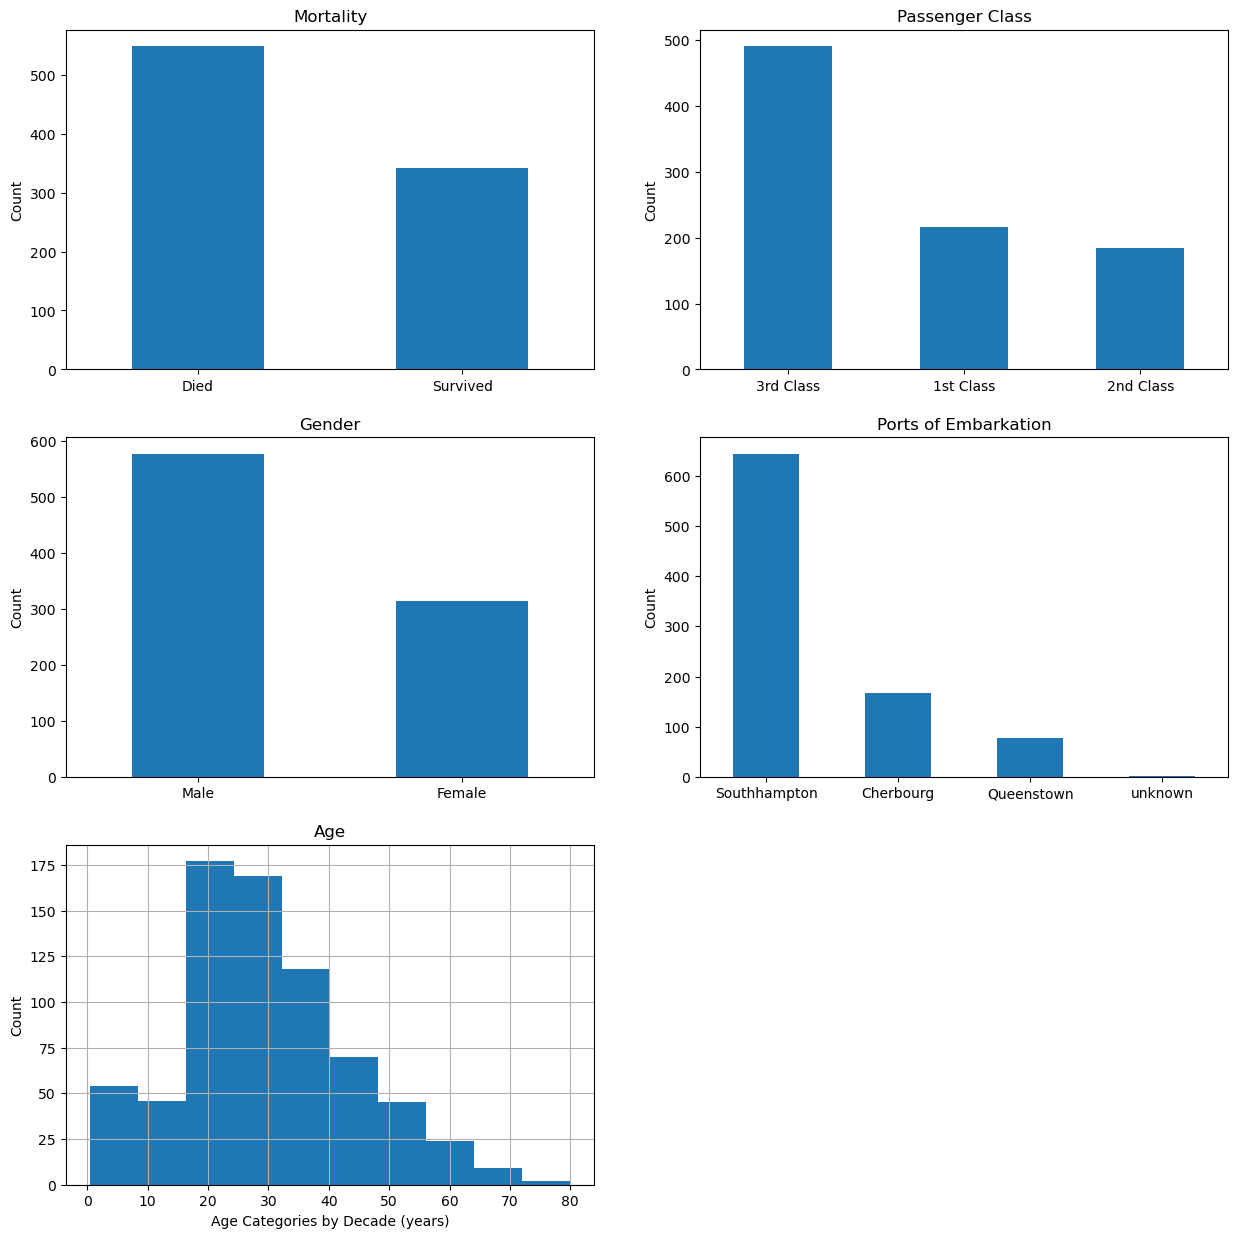

In [15]:

plt.rc('figure', figsize=(15, 15))

bin_size = 10


fig_size = (3, 2)


plt.subplot2grid(fig_size, (0, 0))
titanic_df['Survival'].value_counts().plot(kind='bar', title='Mortality')
plt.xticks(rotation=0)
plt.ylabel('Count')


plt.subplot2grid(fig_size, (0, 1))
titanic_df['Class'].value_counts().plot(kind='bar', title='Passenger Class')
plt.xticks(rotation=0)
plt.ylabel('Count')


plt.subplot2grid(fig_size, (1, 0))
titanic_df['Gender'].value_counts().plot(kind='bar', title='Gender')
plt.xticks(rotation=0)
plt.ylabel('Count')


plt.subplot2grid(fig_size, (1, 1))
titanic_df['Ports'].value_counts().plot(kind='bar', title='Ports of Embarkation')
plt.xticks(rotation=0)
plt.ylabel('Count')


plt.subplot2grid(fig_size, (2, 0))
titanic_df['Age'].hist()
plt.title('Age')
plt.ylabel('Count')
plt.xlabel('Age Categories by Decade (years)')

In [16]:
ageisnull = titanic_df[titanic_df['Age'].isnull()]
ageisnull.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Numeric,Survival,Class,Gender,Ports
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,Died,3rd Class,Male,Queenstown
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,1,Survived,2nd Class,Male,Southhampton
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,0,Survived,3rd Class,Female,Cherbourg
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,1,Died,3rd Class,Male,Cherbourg
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,0,Survived,3rd Class,Female,Queenstown


In [17]:
print('Total passengers with no age: ', len(ageisnull))

Total passengers with no age:  177


In [18]:
titanic_df['Age'].mean()

29.69911764705882

In [19]:
(titanic_df.groupby(['Gender']))['Age'].mean()

Gender
Female    27.915709
Male      30.726645
Name: Age, dtype: float64

In [20]:
(titanic_df.groupby(['Class', 'Gender']))['Age'].mean()

Class      Gender
1st Class  Female    34.611765
           Male      41.281386
2nd Class  Female    28.722973
           Male      30.740707
3rd Class  Female    21.750000
           Male      26.507589
Name: Age, dtype: float64

In [21]:
(titanic_df.groupby(['Class', 'Survival', 'Gender']))['Age'].mean()

Class      Survival  Gender
1st Class  Died      Female    25.666667
                     Male      44.581967
           Survived  Female    34.939024
                     Male      36.248000
2nd Class  Died      Female    36.000000
                     Male      33.369048
           Survived  Female    28.080882
                     Male      16.022000
3rd Class  Died      Female    23.818182
                     Male      27.255814
           Survived  Female    19.329787
                     Male      22.274211
Name: Age, dtype: float64

In [22]:
(titanic_df.groupby(['Class', 'Survival', 'Gender']))['Age'].describe()

count       mean        std    min    25%   50%  \
Class     Survival Gender                                                    
1st Class Died     Female    3.0  25.666667  24.006943   2.00  13.50  25.0   
                   Male     61.0  44.581967  14.457749  18.00  33.00  45.5   
          Survived Female   82.0  34.939024  13.223014  14.00  23.25  35.0   
                   Male     40.0  36.248000  14.936744   0.92  27.00  36.0   
2nd Class Died     Female    6.0  36.000000  12.915107  24.00  26.25  32.5   
                   Male     84.0  33.369048  12.158125  16.00  24.75  30.5   
          Survived Female   68.0  28.080882  12.764693   2.00  21.75  28.0   
                   Male     15.0  16.022000  19.547122   0.67   1.00   3.0   
3rd Class Died     Female   55.0  23.818182  12.833465   2.00  15.25  22.0   
                   Male    215.0  27.255814  12.135707   1.00  20.00  25.0   
          Survived Female   47.0  19.329787  12.303246   0.75  13.50  19.0   
                   Male     38.0  22.274211  11.555786   0.42  16.50  25.0   

                             75%   max  
Class     Survival Gender               
1st Class Died     Female  37.50  50.0  
                   Male    56.00  71.0  
          Survived Female  44.00  63.0  
                   Male    48.00  80.0  
2nd Class Died     Female  42.50  57.0  
                   Male    39.00  70.0  
          Survived Female  35.25  55.0  
                   Male    31.50  62.0  
3rd Class Died     Female  31.00  48.0  
                   Male    34.00  74.0  
          Survived Female  26.50  63.0  
                   Male    29.75  45.0

In [23]:
sex = titanic_df['Gender']
survived = titanic_df['Survival']
pclass = titanic_df['Class']
age_youth = titanic_df['Age'] < 20

pd.crosstab([sex, pclass, age_youth], survived)

Survival                Died  Survived
Gender Class     Age                  
Female 1st Class False     2        78
                 True      1        13
       2nd Class False     6        54
                 True      0        16
       3rd Class False    51        48
                 True     21        24
Male   1st Class False    74        41
                 True      3         4
       2nd Class False    82         7
                 True      9        10
       3rd Class False   249        35
                 True     51        12

In [25]:
print(titanic_df['Age'].head(20))
print(titanic_df['Age_Fill'].head(20))

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5      NaN
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
15    55.0
16     2.0
17     NaN
18    31.0
19     NaN
Name: Age, dtype: float64
0     22.000000
1     38.000000
2     26.000000
3     35.000000
4     35.000000
5     27.255814
6     54.000000
7      2.000000
8     27.000000
9     14.000000
10     4.000000
11    58.000000
12    20.000000
13    39.000000
14    14.000000
15    55.000000
16     2.000000
17    16.022000
18    31.000000
19    19.329787
Name: Age_Fill, dtype: float64


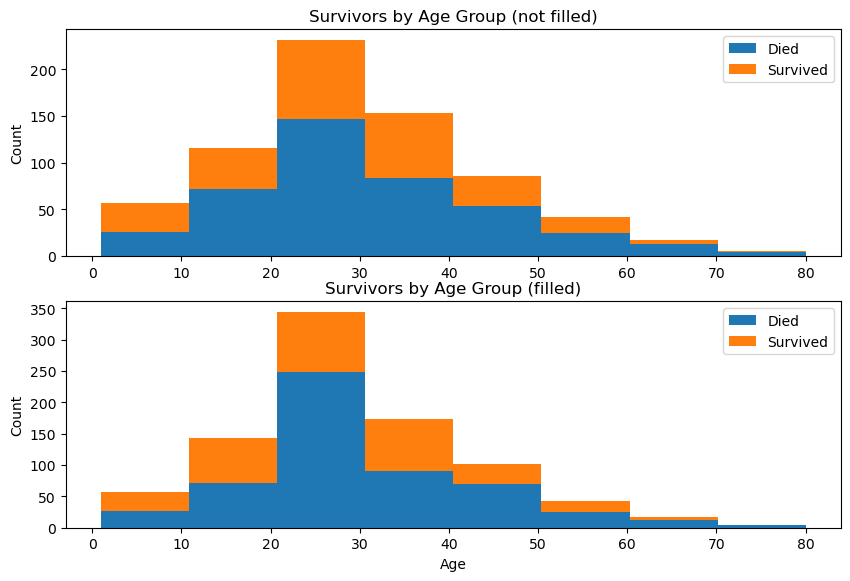

In [26]:
plt.rc('figure', figsize=(10, 10))



df1 = titanic_df[titanic_df['Survived'] == 0]['Age']
df2 = titanic_df[titanic_df['Survived'] == 1]['Age']
df3 = titanic_df[titanic_df['Survived'] == 0]['Age_Fill']
df4 = titanic_df[titanic_df['Survived'] == 1]['Age_Fill']

plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Age Group')
plt.xlabel('Age')
plt.ylabel('Count')

max_age = max(titanic_df['Age_Fill'])

plt.subplot(311)
plt.hist([df1, df2],
             bins=8,
             range=(1, max_age),
             stacked=True)

plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Age Group (not filled)')
plt.ylabel('Count')

plt.subplot(312)
plt.hist([df3, df4],
             bins=8,
             range=(1, max_age),
             stacked=True)

plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Age Group (filled)')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()